# Wordcloud

In [1]:
import stylecloud
stylecloud.gen_stylecloud(file_path='SJ-Speech.txt',
                          icon_name= "fas fa-apple-alt",
                          colors='white', 
                          background_color="black",
                          output_name='apple-1.png',
                          collocations=False) #collocation helps to disperse text

# Stopwords

In [2]:
# it has stopwords by default but we can customize it
from stop_words import get_stop_words

stop_words = get_stop_words('english')
# add or remove stopwords
stop_words.append('my_new_stop_word')
stop_words.remove('my_new_stop_word')

In [3]:
# wordcloud without stopwords
stylecloud.gen_stylecloud(file_path='SJ-Speech.txt',
                          icon_name='fas fa-apple-alt',
                          colors='white',
                          background_color='black',
                          output_name='apple-2.png',
                          collocations=False,
                          custom_stopwords=stop_words)

In [4]:
# wordcloud without stopwords and palette/html colors
stylecloud.gen_stylecloud(file_path='SJ-Speech.txt',
                          icon_name= "fas fa-apple-alt",
#                           colors = '#434FCF', #html colors
                          palette="cartocolors.qualitative.Pastel_3", #palettes
                          background_color="black",
                          output_name='apple-3.png',
                          collocations=False, #collocation helps to disperse text
                          custom_stopwords=stop_words) 

# Add Your Own Image

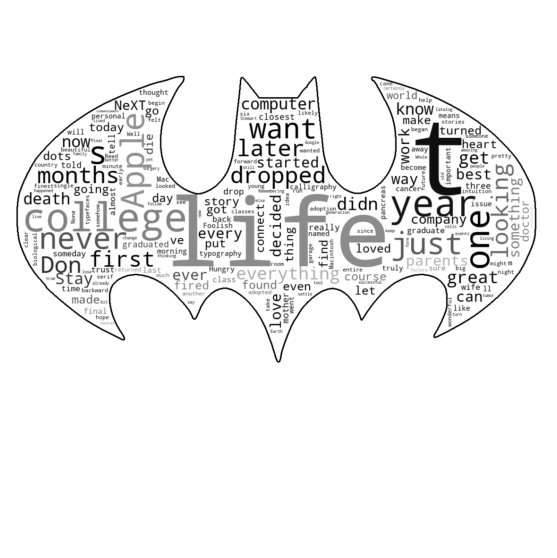

In [5]:
from wordcloud import WordCloud, ImageColorGenerator # make wordclouds
from PIL import Image # load an image
import matplotlib.pyplot as plt # plot the wordcloud
import numpy as np # gets the mask of the image

# create the wordcloud(wc)
my_mask = np.array(Image.open('batman-logo.png')) # get the shape of the wordcloud
wc = WordCloud(background_color = 'white',
               mask=my_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3, # specify contour width
               contour_color='black', # specify contour color
               stopwords=stop_words)
# tead txt file
with open('SJ-Speech.txt', 'r') as txt_file:
    text = txt_file.read()
# make wordcloud
wc.generate(text)

# get colors of the png file and give that color to the wc
image_colors = ImageColorGenerator(my_mask)
wc.recolor(color_func=image_colors)

# plotting
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
wc.to_file("wordcloud.png")
plt.show()